In [6]:
# This cell originally contained a URL, which is not valid Python code and caused a SyntaxError.
# To download the file from the Google Drive link, please use the code in the cells below
# which utilizes the 'gdown' library.
#
# https://drive.google.com/file/d/1dq5Db33RVa9uabwSUOGEeRoWsYXEta2M/view?usp=drive_link

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv("Covid_19 Dataset.csv")

In [9]:
print("Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nInfo:\n")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())


Shape: (231, 15)

Columns:
 Index(['Unnamed: 0', 'country', 'continent', 'population', 'day', 'time',
       'active_cases', 'critical_cases', 'total_cases', 'recovered_cases',
       '1M_pop_cases', '1M_pop_deaths', 'total_deaths', '1M_pop_tests',
       'total_tests'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       231 non-null    int64  
 1   country          231 non-null    object 
 2   continent        229 non-null    object 
 3   population       229 non-null    float64
 4   day              231 non-null    object 
 5   time             231 non-null    object 
 6   active_cases     184 non-null    float64
 7   critical_cases   52 non-null     float64
 8   total_cases      231 non-null    int64  
 9   recovered_cases  183 non-null    float64
 10  1M_pop_cases     229 non-null    flo

In [10]:
display(data.head())
display(data.describe())

,Unnamed: 0,country,continent,population,day,time,active_cases,critical_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,0,Afghanistan,Asia,40754388.0,2025-07-28,2025-07-28 16:15:05+00:00,15098.0,NaN,234174,211080.0,5746.0,196.0,7996.0,34125.0,1390730.0
1,1,Albania,Europe,2866374.0,2025-07-28,2025-07-28 16:15:05+00:00,1025.0,NaN,334863,330233.0,116825.0,1258.0,3605.0,677173.0,1941032.0
2,2,Algeria,Africa,45350148.0,2025-07-28,2025-07-28 16:15:05+00:00,82068.0,NaN,272010,183061.0,5998.0,152.0,6881.0,5093.0,230960.0
3,3,Andorra,Europe,77463.0,2025-07-28,2025-07-28 16:15:06+00:00,NaN,NaN,48015,NaN,619844.0,2130.0,165.0,3225256.0,249838.0
4,4,Angola,Africa,35027343.0,2025-07-28,2025-07-28 16:15:06+00:00,1971.0,NaN,107327,103419.0,3064.0,55.0,1937.0,42818.0,1499795.0


,Unnamed: 0,population,active_cases,critical_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
count,231.000000,2.290000e+02,1.840000e+02,52.000000,2.310000e+02,1.830000e+02,229.000000,224.000000,2.260000e+02,2.130000e+02,2.130000e+02
mean,115.000000,3.469404e+07,3.323757e+04,55.326923,3.050883e+06,3.063211e+06,202950.253275,1277.348214,3.102071e+04,2.155978e+06,3.298829e+07
std,66.828138,1.386374e+08,1.654554e+05,142.919382,1.002125e+07,1.024277e+07,206154.889634,1310.431844,1.103436e+05,3.647972e+06,1.198779e+08
min,0.000000,7.990000e+02,0.000000e+00,1.000000,9.000000e+00,2.000000e+00,16.000000,2.000000,1.000000e+00,5.093000e+03,7.850000e+03
25%,57.500000,4.454310e+05,2.875000e+01,3.750000,2.636600e+04,1.902150e+04,18885.000000,172.750000,2.055000e+02,1.981990e+05,3.478150e+05
50%,115.000000,5.797805e+06,5.390000e+02,11.000000,2.068970e+05,1.870780e+05,128843.000000,846.500000,2.204500e+03,8.851190e+05,2.226216e+06
75%,172.500000,2.210284e+07,5.842500e+03,24.250000,1.348198e+06,1.503542e+06,333985.000000,2092.250000,1.480600e+04,2.439107e+06,1.346373e+07
max,230.000000,1.448471e+09,1.783377e+06,940.000000,1.118201e+08,1.098144e+08,771655.000000,6595.000000,1.219487e+06,2.330212e+07,1.186852e+09


In [11]:
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

In [12]:
data['day'] = pd.to_datetime(data['day'])


In [13]:
data['month'] = data['day'].dt.month
data['year'] = data['day'].dt.year


Top 10 Countries by Total Cases:
      country  total_cases
220      USA    111820082
94     India     45035393
72    France     40138560
78   Germany     38828995
26    Brazil     38743918
171  S-Korea     34571873
104    Japan     33803572
101    Italy     26723249
217       UK     24910387
169   Russia     24124215


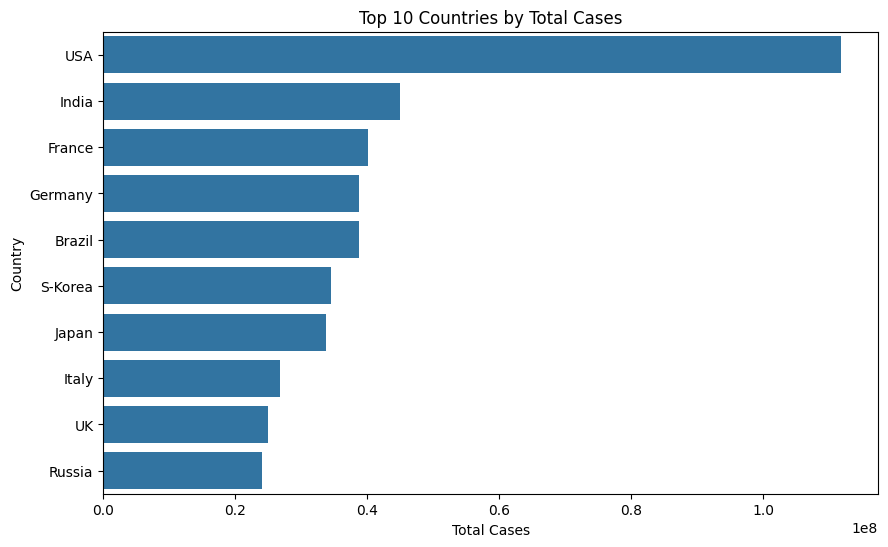

In [14]:
top_cases = data.sort_values('total_cases', ascending=False).head(10)
print("\nTop 10 Countries by Total Cases:\n", top_cases[['country','total_cases']])

plt.figure(figsize=(10,6))
sns.barplot(x='total_cases', y='country', data=top_cases)
plt.title("Top 10 Countries by Total Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

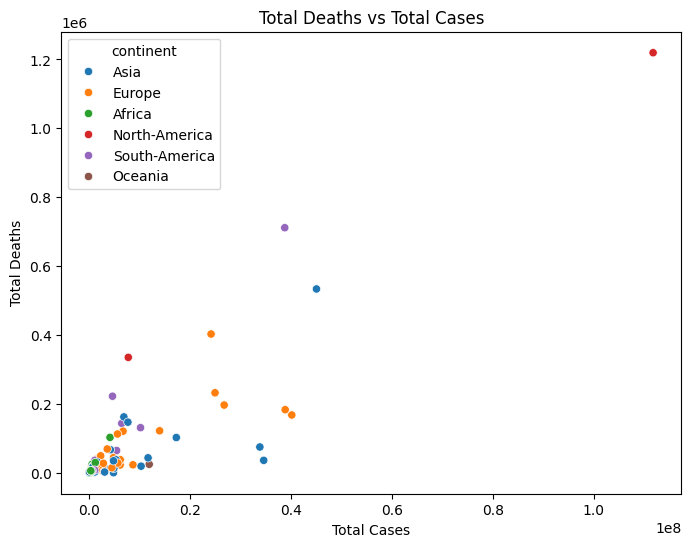

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_cases', y='total_deaths', hue='continent', data=data)
plt.title("Total Deaths vs Total Cases")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

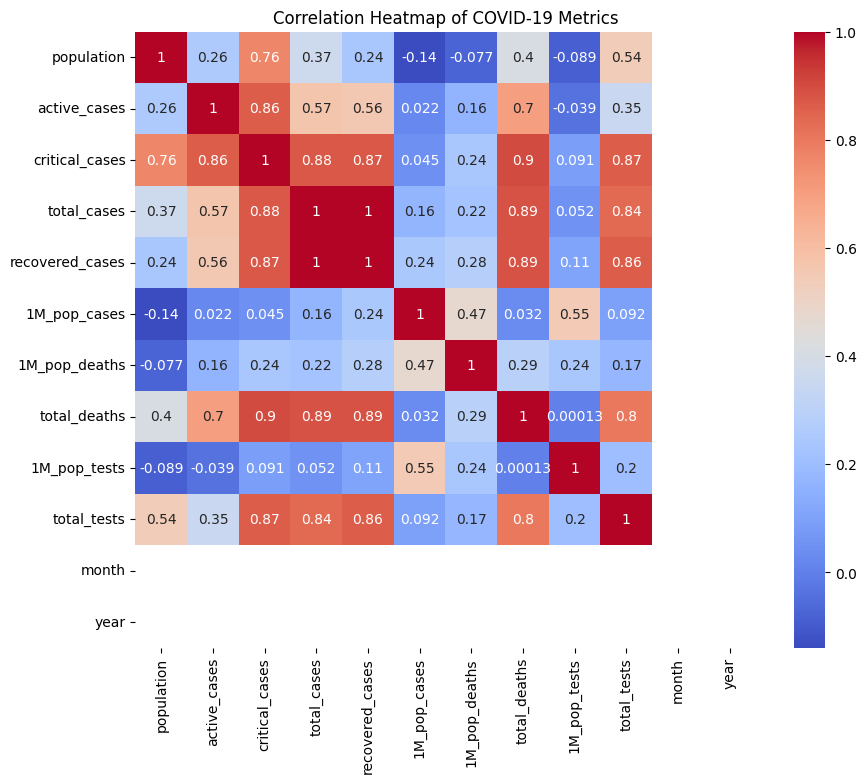

In [16]:
corr = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.show()

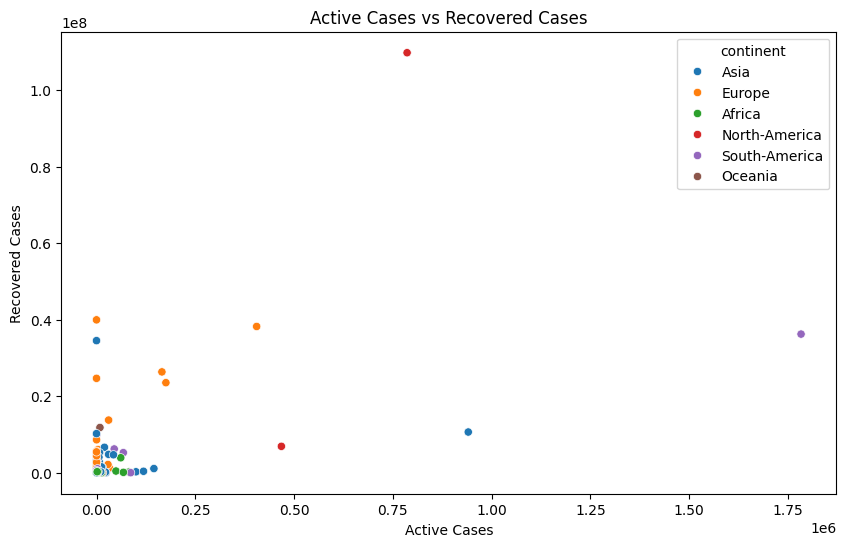

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='active_cases', y='recovered_cases', hue='continent', data=data)
plt.title("Active Cases vs Recovered Cases")
plt.xlabel("Active Cases")
plt.ylabel("Recovered Cases")
plt.show()


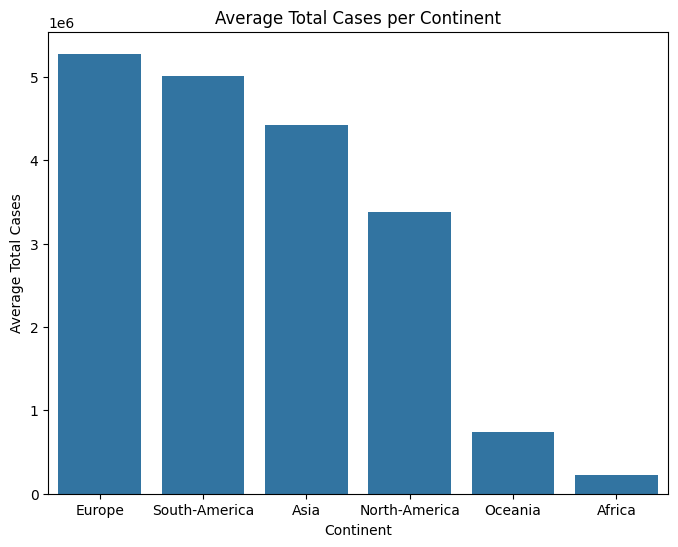

In [18]:
continent_cases = data.groupby('continent', as_index=False)['total_cases'].mean().sort_values(by='total_cases', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='continent', y='total_cases', data=continent_cases)
plt.title("Average Total Cases per Continent")
plt.xlabel("Continent")
plt.ylabel("Average Total Cases")
plt.show()


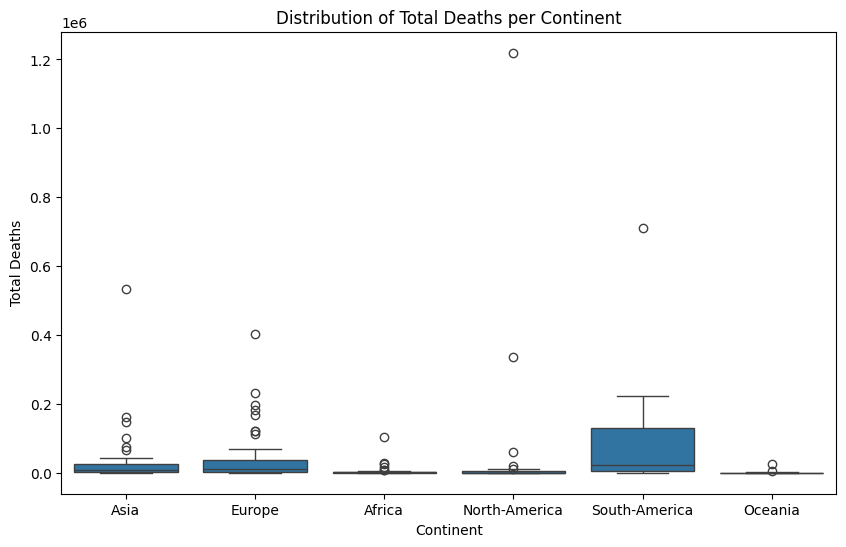

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='continent', y='total_deaths', data=data)
plt.title("Distribution of Total Deaths per Continent")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.show()

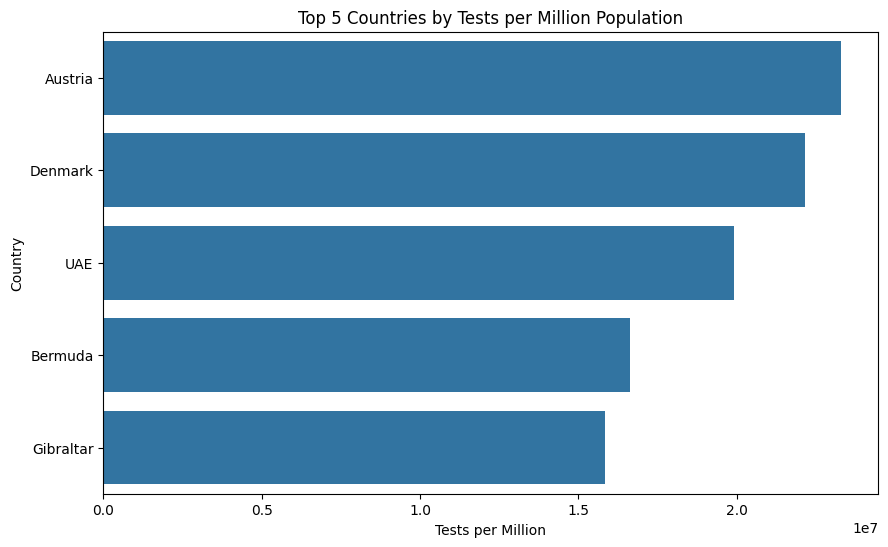

In [20]:
top_tests = data.sort_values('1M_pop_tests', ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x='1M_pop_tests', y='country', data=top_tests)
plt.title("Top 5 Countries by Tests per Million Population")
plt.xlabel("Tests per Million")
plt.ylabel("Country")
plt.show()

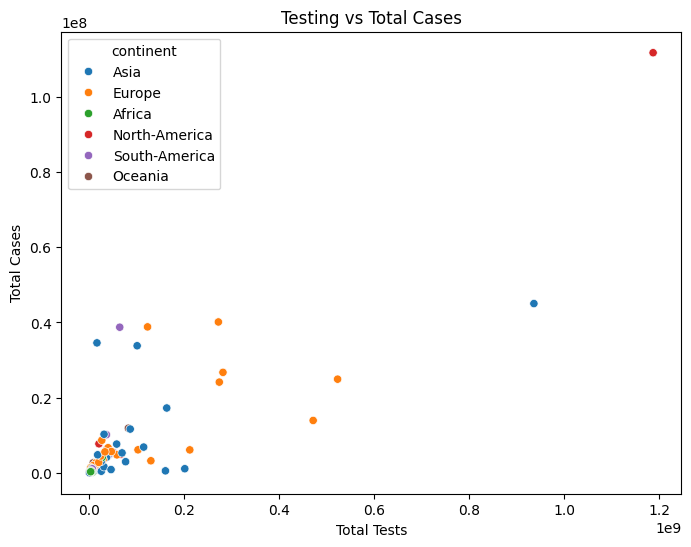

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_tests', y='total_cases', hue='continent', data=data)
plt.title("Testing vs Total Cases")
plt.xlabel("Total Tests")
plt.ylabel("Total Cases")
plt.show()

In [22]:
if len(data['day'].unique()) > 1:
    trend = data.groupby('day', as_index=False)['total_cases'].sum()
    plt.figure(figsize=(10,6))
    sns.lineplot(x='day', y='total_cases', data=trend)
    plt.title("Global COVID-19 Total Cases Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.show()